In [63]:
import pandas as pd

# 1) Lectura del archivo

In [64]:
data = pd.read_csv('n_movies.csv')

# 2) Verificar informacion del dataframe

In [65]:
# 1) Ver el dataframe
data

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


In [66]:
# 2) Ver las columnas
data.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')

In [67]:
# 3) Verificar informacion de las columnas (nombre, cantidad de nulos y tipo de datos)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [68]:
# 4) Describir la data en datos estadísticos básicos (sólo lo hace con los datos que son de tipo int o float)
data.describe()

,rating
count,8784.000000
mean,6.764515
std,1.214840
min,1.700000
25%,6.100000
50%,6.900000
75%,7.600000
max,9.900000


# 3) Pre procesamiento

Tal como se ve en el dataframe cargado, tenemos informacion que tenemos que preprocesar para poder seguir avanzando en nuestro análisis y así poder hacer un buen análisis descriptivo.

Para eso, haremos una funcion que haga lo siguiente:
1. Transformar la columna "year" a dos columnas, una de "inicio" que indique cuando empieza la serie y otra de "fin" que indique cuando termine. En caso de seguir al aire, colocar un "En proceso".

2. En la columna "duration" eliminar la palabra "min" y dejar todo en minutos con formato int64.

3. Eliminar columna "stars"

4. Transformar columna "votes" a float. Para eso, eliminaremos la coma y transformaremos el numero a int64.

5. Transformar columna "genre" a múltiples columnas de tipos de géneros, donde se asigne el valor de 1 cuando la serie presente tal género, 0 si no.

## 3.1. Transformación columna "year"

In [69]:
# Creo un dataframe nuevo, para así no modificar el original
data2 = data.copy()

In [70]:
# Modifico la misma columna, para separar los datos mediante el guión que los separa
data2["year"] = data2.apply(
    lambda x:
        str(x["year"]).split(sep= '–'),
        axis = 1
)

In [71]:
# Creo una columna que toma el año de inicio, tomando las primeras 4 cifras después de los paréntesis.
data2["start_year"] = data2.apply(
    lambda x:
        str(x["year"])[3:7],
        axis = 1
)   

In [72]:
# Me quedo sólo con los elementos que pueden ser numéricos (es decir, series que empiecen con 1XXX o 2XXX). Al resto les coloco la etiqueta de "Quitar".
data2["start_year"] = data2.apply(
    lambda x:
        x["start_year"] if ((str(x["start_year"][0]) == "1") | (str(x["start_year"][0]) == "2")) else "Quitar"
        , axis = 1
)

In [73]:
# Con ayuda de la etiqueta "Quitar", me quedo sólo con los que son años válidos y los trasformo a float
data2 = data2[data2["start_year"] != "Quitar"]

data2["start_year"] = data2["start_year"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [74]:
# Creo una columna que toma el año de término, tomando las últimas 4 cifras después de los paréntesis.
data2["end_year"] = data2.apply(
    lambda x:
        str(x["year"])[-7:-3],
        axis = 1
)  

# Me quedo sólo con los elementos que pueden ser numéricos (es decir, series que empiecen con 1XXX o 2XXX). Al resto les coloco la etiqueta de "Quitar".
data2["end_year"] = data2.apply(
    lambda x:
        x["end_year"] if ((str(x["end_year"][0]) == "1") | (str(x["end_year"][0]) == "2")) else "No_Termino"
        , axis = 1
)


En este caso no eliminare las filas de "No_termino" y transformaré a float, ya que eso se deberá hacer en un analisis pre y post antes de considerar ese valor (o sino estaría eliminando series sólo por no haber terminado)

In [75]:
# Elimino la columna year
data2 = data2.drop(columns="year")

In [76]:
data2

,title,certificate,duration,genre,rating,description,stars,votes,start_year,end_year
0,Cobra Kai,TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",2018,No_Termino
1,The Crown,TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",2016,No_Termino
2,Better Call Saul,TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",2015,2022
3,Devil in Ohio,TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",2022,2022
4,Cyberpunk: Edgerunners,TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",2022,No_Termino
...,...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130",2022,No_Termino
9953,The Walking Dead,TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067",2010,2022
9954,The Crown,TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898",2016,No_Termino
9955,Supernatural,TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601",2005,2020


In [77]:
# Finalmente, puedo escribir la función que realice todo estos pasos
def limpieza_col_year(
    df: pd.DataFrame
    ) -> pd.DataFrame:

    # Modifico la misma columna, para separar los datos mediante el guión que los separa
    df["year"] = df.apply(
        lambda x:
            str(x["year"]).split(sep= '–'),
            axis = 1
    )

    # Creo una columna que toma el año de inicio, tomando las primeras 4 cifras después de los paréntesis.
    df["start_year"] = df.apply(
        lambda x:
            str(x["year"])[3:7],
            axis = 1
    )  

    # Me quedo sólo con los elementos que pueden ser numéricos (es decir, series que empiecen con 1XXX o 2XXX). Al resto les coloco la etiqueta de "Quitar".
    df["start_year"] = df.apply(
        lambda x:
            x["start_year"] if ((str(x["start_year"][0]) == "1") | (str(x["start_year"][0]) == "2")) else "Quitar"
            , axis = 1
    )

    # Con ayuda de la etiqueta "Quitar", me quedo sólo con los que son años válidos y los trasformo a float
    df = df[df["start_year"] != "Quitar"]

    df["start_year"] = df["start_year"].astype(int)

    # Creo una columna que toma el año de término, tomando las últimas 4 cifras después de los paréntesis.
    df["end_year"] = df.apply(
        lambda x:
            str(x["year"])[-7:-3],
            axis = 1
    )  

    # Me quedo sólo con los elementos que pueden ser numéricos (es decir, series que empiecen con 1XXX o 2XXX). Al resto les coloco la etiqueta de "Quitar".
    df["end_year"] = df.apply(
        lambda x:
            x["end_year"] if ((str(x["end_year"][0]) == "1") | (str(x["end_year"][0]) == "2")) else "No_Termino"
            , axis = 1
    )

    # Elimino la columna year
    df = df.drop(columns="year")

    return df


In [78]:
data2 = data.copy()

In [79]:
data_test = limpieza_col_year(df = data2)
data_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,title,certificate,duration,genre,rating,description,stars,votes,start_year,end_year
0,Cobra Kai,TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",2018,No_Termino
1,The Crown,TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",2016,No_Termino
2,Better Call Saul,TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",2015,2022
3,Devil in Ohio,TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",2022,2022
4,Cyberpunk: Edgerunners,TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",2022,No_Termino
...,...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130",2022,No_Termino
9953,The Walking Dead,TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067",2010,2022
9954,The Crown,TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898",2016,No_Termino
9955,Supernatural,TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601",2005,2020


## 3.2. Transformación columna "duration"

In [80]:
# Realizo una copia de los datos originales
data3 = data.copy()

In [81]:
# Creo una lista vacía donde guardaré los datos
empty_list = []

# Hago un ciclo que recorra los elementos de la columna
for i in data3["duration"]:

    # Realizo una separacion por espacio de separación
    resultado = str(i).split(sep= ' ')

    # Guardo el primer elemento de la lista generada en la lista vacía.
    empty_list.append(resultado[0])

# Modifico el valor de la columna para introducir los generados
data3["duration"] = empty_list

Al igual que con la columna "year", no realizaré la eliminación de los datos 'nan' para así transformar después los restantes a int, puesto que estaré eliminando series que no contengan duración.

In [82]:
# Creo una función para la limpieza de esta columna
def limpieza_col_duration(
    df: pd.DataFrame
    ) -> pd.DataFrame:

    # Creo una lista vacía donde guardaré los datos
    empty_list = []

    # Hago un ciclo que recorra los elementos de la columna
    for i in df["duration"]:

        # Realizo una separacion por espacio de separación
        resultado = str(i).split(sep= ' ')

        # Guardo el primer elemento de la lista generada en la lista vacía.
        empty_list.append(resultado[0])

    # Modifico el valor de la columna para introducir los generados
    df["duration"] = empty_list

    return df

In [83]:
data_test = limpieza_col_duration(df = data3)
data_test

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


Importante recalcar que, mediante este procedimiento (realizando un for), consumimos un tiempo relativamente similar al aplicado por la función apply/lambda. Sin embargo, esto es posible SI Y SOLO SI se genera una lista y LUEGO se añade o se modifica al dataframe, ya que si en el mismo ciclo realizamos dicho procedimiento, los tiempos de cómputo serán sustancialmente mayores.

## 3.3. Transformación columna "stars"

In [84]:
# Como esta columna solo se elimina, generamos una función que lo realice.
def limpieza_col_stars(
    df: pd.DataFrame
    ) -> pd.DataFrame:

    # Con esta función se puede eliminar una o más columnas a elección
    df = df.drop(columns=["stars"])

    return df

Desafío 1: ¿Cómo podrías transformar esta columna para obtener de ella más valor?

##  3.4. Transformación columna "votes"

In [85]:
# Realizo una copia del dataframe original
data4 = data.copy()

In [86]:
# Reemplazo los valores de coma milesimal
data4["votes"] = data4.apply(
    lambda x:
    str(x["votes"]).replace(",",""),
    axis = 1
)

In [87]:
# Transformo la columna values a numerica
data4["votes"] = data4["votes"].astype('float')

In [88]:
# Realizo una función que agrupe todo
def limpieza_col_votes(
    df: pd.DataFrame
    ) -> pd.DataFrame:

    # Reemplazo los valores de coma milesimal
    df["votes"] = df.apply(
        lambda x:
        str(x["votes"]).replace(",",""),
        axis = 1
    )

    # Transformo la columna values a numerica
    df["votes"] = df["votes"].astype('float')

    return df

## 3.5. Transformación columna "genre"

In [89]:
# Como esta columna solo se elimina, generamos una función que lo realice.
def limpieza_col_genres(
    df: pd.DataFrame
    ) -> pd.DataFrame:

    # Con esta función se puede eliminar una o más columnas a elección
    df = df.drop(columns=["genre"])

    return df

Desafío 2: ¿Cómo podrías transformar esta columna para obtener de ella más valor?

# 4) Función general preprocesamiento

En este momento podemos incluir todos los códigos en una gran función, o simplemente ir llamandolas a todas dentro de la misma

In [90]:
data_test = data.copy()

In [114]:
def preprocessing_v1(
    df: pd.DataFrame
    ) -> pd.DataFrame:

    # Elimino las siguientes columnas
    df = df.drop(columns=["stars", "genre", "description", "title"])

    # Realizo la limpieza de las siguientes columnas
    df = limpieza_col_duration(df = df)
    df = limpieza_col_votes(df = df)
    df = limpieza_col_year(df = df)

    return df

In [115]:
data_preproccesed = preprocessing_v1(df = data_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [116]:
data_preproccesed

,certificate,duration,rating,votes,start_year,end_year
0,TV-14,30,8.5,177031.0,2018,No_Termino
1,TV-MA,58,8.7,199885.0,2016,No_Termino
2,TV-MA,46,8.9,501384.0,2015,2022
3,TV-MA,356,5.9,9773.0,2022,2022
4,TV-MA,24,8.6,15413.0,2022,No_Termino
...,...,...,...,...,...,...
9952,TV-MA,45,6.3,3130.0,2022,No_Termino
9953,TV-MA,44,8.1,970067.0,2010,2022
9954,TV-MA,58,8.7,199898.0,2016,No_Termino
9955,TV-14,44,8.4,439601.0,2005,2020


# 5) Análisis descriptivo - pre limpieza de datos nulos

Con el análisis descriptivo, podemos ver algunas anomalías que poder limpiar posteriormente. Un ejemplo es aplicar describe, el cual nos muestra los datos estadísticos más relevantes de los valores numéricos 

In [94]:
data_preproccesed.describe()

,rating,votes,start_year
count,8460.000000,8.460000e+03,8981.000000
mean,6.791915,1.902865e+04,2015.750362
std,1.211806,8.758875e+04,8.620806
min,1.700000,5.000000e+00,1932.000000
25%,6.100000,2.740000e+02,2015.000000
50%,6.900000,1.133000e+03,2018.000000
75%,7.600000,5.099000e+03,2020.000000
max,9.900000,1.844075e+06,2025.000000


Aquí podemos ver información relevante acerca de la media, cuartiles, mínimos y máximos. En este caso estos últimos (mínimos y máximos) hacen sentido (por ejemplo, ninguna pelicula es del año 3006), pero si existieran algunas con datos anómalos, deben ser eliminados y/o transformados a otra categoría si no queremos perder ese valor.

Otra manera más sencilla es aplicar un histograma, para que nos muestre de manera acumulada los datos

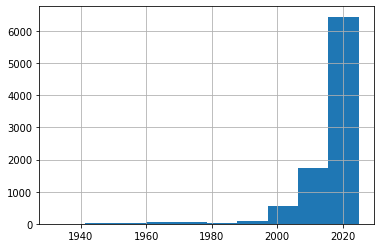

In [95]:
(data_preproccesed["start_year"]).hist(bins=10)

Otra función útil es groupby, el cual me permite agrupar datos categóricos y así examinarlos en mejor detalle.

In [96]:
data_preproccesed.groupby("certificate").count()

,title,duration,rating,votes,start_year,end_year
certificate,,,,,,
12,1,1,1,1,1,1
Approved,26,26,25,25,26,26
E10+,1,1,0,0,1,1
G,42,42,42,42,42,42
M,1,1,1,1,1,1
MA-17,1,1,1,1,1,1
NC-17,4,4,4,4,4,4
Not Rated,426,426,419,419,426,426
PG,146,146,142,142,146,146


Aquí es necesario entender el contexto de los datos para poder sacar más provecho. De acuerdo con el documento adjuntado "dtv_movieratings", podemos ver que existen muchas clasificaciones, pero quizás nosotros necesitemos solamente separar si la pelicula es para "Todo Público", "Menores de 17", "Adultos" y "No categorizada"

In [103]:
data2 = data_preproccesed.copy()

In [104]:
data2["Todo_Publico"] = data2.apply(
    lambda x:
        1 if ((x["certificate"] == "G") |
              (x["certificate"] == "TV-G") |
              (x["certificate"] == "TV-Y")) else 0,
        axis = 1
)

data2["No_Categorizada"] = data2.apply(
    lambda x:
        1 if ((x["certificate"] == "Not Rated") |
              (x["certificate"] == "Unrated")) else 0,
        axis = 1
)

data2["Adultos"] = data2.apply(
    lambda x:
      1 if ((x["certificate"] == "M") |
            (x["certificate"] == "MA-17") |
            (x["certificate"] == "NC-17") |
            (x["certificate"] == "R") | 
            (x["certificate"] == "TV-MA")) else 0,
      axis = 1
)


data2["Menores_17"] = data2.apply(
    lambda x:
      1 if ((x["certificate"] != "M") &
            (x["certificate"] != "MA-17") &
            (x["certificate"] != "NC-17") &
            (x["certificate"] != "R") &
            (x["certificate"] != "TV-MA") &
            (x["certificate"] != "G") &
            (x["certificate"] != "TV-G") &
            (x["certificate"] != "TV-Y") &
            (x["certificate"] != "Not Rated") &
            (x["certificate"] != "Unrated")) else 0,
      axis = 1
)

In [105]:
data2

,title,certificate,duration,rating,votes,start_year,end_year,Todo_Publico,No_Categorizada,Adultos,Menores_17
0,Cobra Kai,TV-14,30,8.5,177031.0,2018,No_Termino,0,0,0,1
1,The Crown,TV-MA,58,8.7,199885.0,2016,No_Termino,0,0,1,0
2,Better Call Saul,TV-MA,46,8.9,501384.0,2015,2022,0,0,1,0
3,Devil in Ohio,TV-MA,356,5.9,9773.0,2022,2022,0,0,1,0
4,Cyberpunk: Edgerunners,TV-MA,24,8.6,15413.0,2022,No_Termino,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,TV-MA,45,6.3,3130.0,2022,No_Termino,0,0,1,0
9953,The Walking Dead,TV-MA,44,8.1,970067.0,2010,2022,0,0,1,0
9954,The Crown,TV-MA,58,8.7,199898.0,2016,No_Termino,0,0,1,0
9955,Supernatural,TV-14,44,8.4,439601.0,2005,2020,0,0,0,1


Por lo tanto, haremos una funcion que me categorice los certificados de las peliculas

In [110]:
def categorize_certificate(
    df: pd.DataFrame
    ) -> pd.DataFrame:

  df["Todo_Publico"] = df.apply(
      lambda x:
          1 if ((x["certificate"] == "G") |
                (x["certificate"] == "TV-G") |
                (x["certificate"] == "TV-Y")) else 0,
          axis = 1
  )

  df["No_Categorizada"] = df.apply(
      lambda x:
          1 if ((x["certificate"] == "Not Rated") |
                (x["certificate"] == "Unrated")) else 0,
          axis = 1
  )

  df["Adultos"] = df.apply(
      lambda x:
        1 if ((x["certificate"] == "M") |
              (x["certificate"] == "MA-17") |
              (x["certificate"] == "NC-17") |
              (x["certificate"] == "R") | 
              (x["certificate"] == "TV-MA")) else 0,
        axis = 1
  )


  df["Menores_17"] = df.apply(
      lambda x:
        1 if ((x["certificate"] != "M") &
              (x["certificate"] != "MA-17") &
              (x["certificate"] != "NC-17") &
              (x["certificate"] != "R") &
              (x["certificate"] != "TV-MA") &
              (x["certificate"] != "G") &
              (x["certificate"] != "TV-G") &
              (x["certificate"] != "TV-Y") &
              (x["certificate"] != "Not Rated") &
              (x["certificate"] != "Unrated")) else 0,
        axis = 1
  )

  df = df.drop(columns = ["certificate"])

  return df

In [117]:
data2 = data_preproccesed.copy()

In [118]:
data_preproccesed_2 = categorize_certificate(df = data2)
data_preproccesed_2

,duration,rating,votes,start_year,end_year,Todo_Publico,No_Categorizada,Adultos,Menores_17
0,30,8.5,177031.0,2018,No_Termino,0,0,0,1
1,58,8.7,199885.0,2016,No_Termino,0,0,1,0
2,46,8.9,501384.0,2015,2022,0,0,1,0
3,356,5.9,9773.0,2022,2022,0,0,1,0
4,24,8.6,15413.0,2022,No_Termino,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9952,45,6.3,3130.0,2022,No_Termino,0,0,1,0
9953,44,8.1,970067.0,2010,2022,0,0,1,0
9954,58,8.7,199898.0,2016,No_Termino,0,0,1,0
9955,44,8.4,439601.0,2005,2020,0,0,0,1


Por último, voy a tratar al año de No_termino como 2023, para así seguir con mi análisis.

In [121]:
def renombrar_ano(
    df: pd.DataFrame) -> pd.DataFrame:

    df["end_year"] = df.apply(
        lambda x:
          2023 if x["end_year"] == "No_Termino" else x["end_year"],
        axis = 1
    )

    df["end_year"] = df["end_year"].astype(int)

    return df

In [122]:
data_preproccesed_3 = renombrar_ano(df = data_preproccesed_2)
data_preproccesed_3

,duration,rating,votes,start_year,end_year,Todo_Publico,No_Categorizada,Adultos,Menores_17
0,30,8.5,177031.0,2018,2023,0,0,0,1
1,58,8.7,199885.0,2016,2023,0,0,1,0
2,46,8.9,501384.0,2015,2022,0,0,1,0
3,356,5.9,9773.0,2022,2022,0,0,1,0
4,24,8.6,15413.0,2022,2023,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9952,45,6.3,3130.0,2022,2023,0,0,1,0
9953,44,8.1,970067.0,2010,2022,0,0,1,0
9954,58,8.7,199898.0,2016,2023,0,0,1,0
9955,44,8.4,439601.0,2005,2020,0,0,0,1


Por lo tanto, la funcion final de preprocesamiento quedaría de la siguiente manera:

In [124]:
def preprocessing(
    df: pd.DataFrame
    ) -> pd.DataFrame:

    # Elimino las siguientes columnas
    df = df.drop(columns=["stars", "genre", "description", "title"])

    # Realizo la limpieza de las siguientes columnas
    df = limpieza_col_duration(df = df)
    df = limpieza_col_votes(df = df)
    df = limpieza_col_year(df = df)

    # Realizo agrupamiento de variable categoriza certificate
    df = categorize_certificate(df = df)

    # Hago el renombre de las series que aún no han terminado por 2023 y convierto a tipo int su valor
    df = renombrar_ano(df = df)

    return df

In [125]:
data_test = data.copy()
data_preproccesed = preprocessing(df = data_test)
data_preproccesed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,duration,rating,votes,start_year,end_year,Todo_Publico,No_Categorizada,Adultos,Menores_17
0,30,8.5,177031.0,2018,2023,0,0,0,1
1,58,8.7,199885.0,2016,2023,0,0,1,0
2,46,8.9,501384.0,2015,2022,0,0,1,0
3,356,5.9,9773.0,2022,2022,0,0,1,0
4,24,8.6,15413.0,2022,2023,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9952,45,6.3,3130.0,2022,2023,0,0,1,0
9953,44,8.1,970067.0,2010,2022,0,0,1,0
9954,58,8.7,199898.0,2016,2023,0,0,1,0
9955,44,8.4,439601.0,2005,2020,0,0,0,1


# 4) Eliminación de datos nulos